#Table of Contents
* [Purpose](#Purpose)
* [Test counter and modulus operation to generate array index values](#Test-counter-and-modulus-operation-to-generate-array-index-values)
* [Add a test signal (impulse function) to counter/index outputs](#Add-a-test-signal-%28impulse-function%29-to-counter/index-outputs)
* [Index and actual values for test_signal & delay_line](#Index-and-actual-values-for-test_signal-&-delay_line)
* [Low pass filter with linear phase](#Low-pass-filter-with-linear-phase)
	* [Rectangular pulse](#Rectangular-pulse)
		* [NO COEFFICIENT NORMALIZATION](#NO-COEFFICIENT-NORMALIZATION)
		* [With normalized coefficients](#With-normalized-coefficients)
	* [Impulse - normalized coefficients: looks bad](#Impulse---normalized-coefficients:-looks-bad)
	* [Pulse with raised cosine](#Pulse-with-raised-cosine)
	* [Gaussian modulation of raised cosine](#Gaussian-modulation-of-raised-cosine)
	* [Gaussian](#Gaussian)
	* [Repeat impulse function](#Repeat-impulse-function)
	* [Impulse again with 5 digits for each float](#Impulse-again-with-5-digits-for-each-float)
		* [Much better!](#Much-better!)
	* [Conclusion](#Conclusion)


In [1]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [47]:
def determine_xlimits(array_to_search, length):
    initial = 0
    for i in range(len(array_to_search)):
        if array_to_search[i] > 0.95:
            initial = i - length/2
            break
    final = i + length/2
    return initial, final

In [3]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000, 2)

# Purpose

Re-write Teensy filter code from scratch. Take an incremental approach and test after each code increment is added. Do a git commit after each successful increment/test.

# Test counter and modulus operation to generate array index values

[[''], ['10682', '1000', '682', '682'], ['10683', '1000', '683', '683'], ['10684', '1000', '684', '684'], ['10685', '1000', '685', '685']]
(2000, 4)


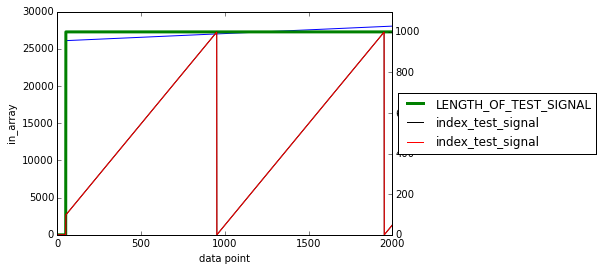

In [40]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0], label='counter')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,1], 'g', linewidth=3, label='LENGTH_OF_TEST_SIGNAL')
ax2.plot(range(n_values), values4[:,2], 'k', label='index_test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='index_test_signal')
#ax.set_ylim(-1, 2)
ax2.set_ylim(0,1100)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

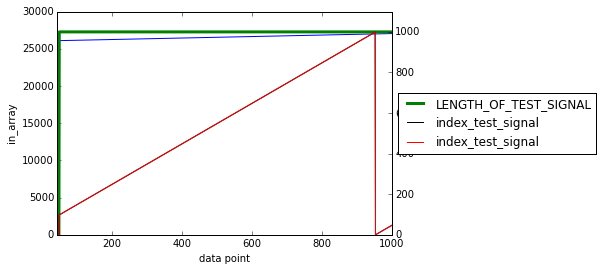

In [42]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,1], 'g', linewidth=3, label='LENGTH_OF_TEST_SIGNAL')
ax2.plot(range(n_values), values4[:,2], 'k', label='index_test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='index_test_signal')
#ax.set_ylim(-1, 2)
ax2.set_ylim(0, 1100)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(45,1000)
position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');

# Add a test signal (impulse function) to counter/index outputs

[['0', '538', '0.00'], ['23539', '1000', '539', '0.00'], ['23540', '1000', '540', '0.00'], ['23541', '1000', '541', '0.00'], ['23542', '1000', '542', '0.00']]
(2000, 4)


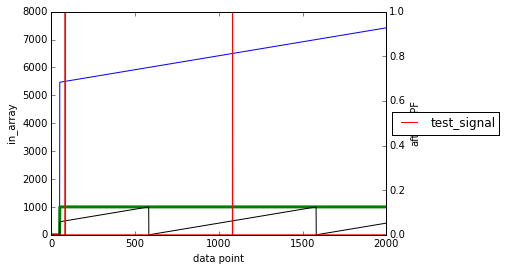

In [45]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0], label='counter')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', linewidth=3, label='length_of_test_signal')
ax.plot(range(n_values), values4[:,2], 'k', label='index_test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='test_signal')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

82.0


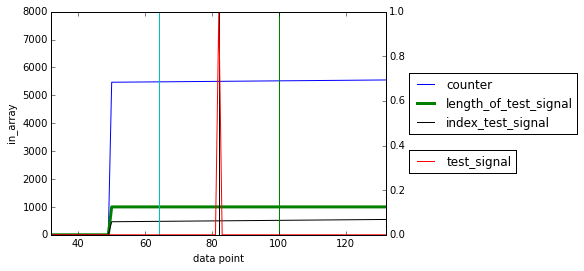

In [56]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0], label='counter')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', linewidth=3, label='length_of_test_signal')
ax.plot(range(n_values), values4[:,2], 'k', label='index_test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='test_signal')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,3],100)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g');

# Index and actual values for test_signal & delay_line

[['0', '0.00'], ['217', '7', '0.00', '0.00'], ['218', '8', '0.00', '0.00'], ['219', '9', '0.00', '0.00'], ['220', '10', '0.00', '0.00']]
(2000, 4)


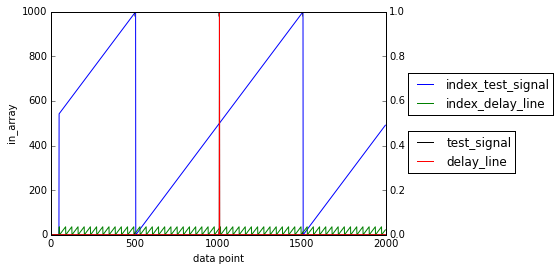

In [59]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='delay_line')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

1008.0


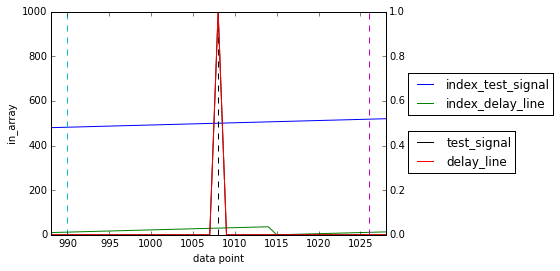

In [64]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='test_signal')
ax2.plot(range(n_values), values4[:,3], 'r', label='delay_line')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,3],40)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');

# Low pass filter with linear phase

## Rectangular pulse 

### NO COEFFICIENT NORMALIZATION

[['', '0.00', '0.00'], ['431', '0', '0.00', '0.00'], ['432', '1', '0.00', '0.00'], ['433', '2', '0.00', '0.00'], ['434', '3', '0.00', '0.00']]
(2000, 4)


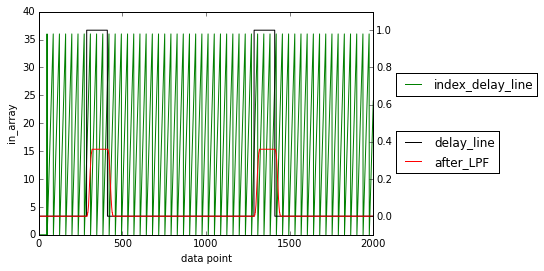

In [100]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

287.0 237.0 337.0


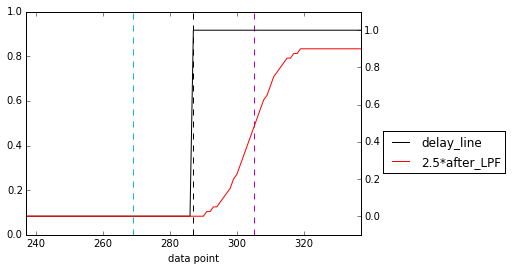

In [103]:
fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
#ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), 2.5*values4[:,3], 'r', label='2.5*after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
#ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,2],100)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');

### With normalized coefficients

[['.00', '0.00'], ['943', '2', '0.00', '0.00'], ['944', '3', '0.00', '0.00'], ['945', '4', '0.00', '0.00'], ['946', '5', '0.00', '0.00']]
(2000, 4)


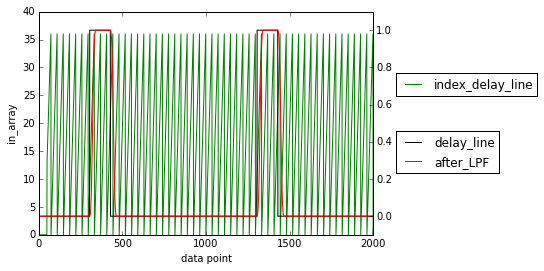

In [94]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

305.0 255.0 355.0


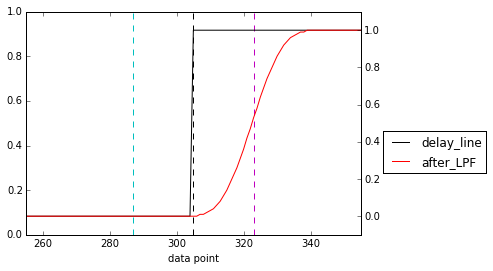

In [95]:
fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
#ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
#ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,2],100)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');

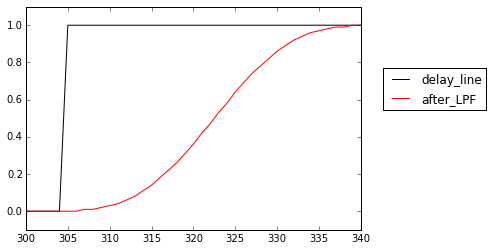

In [98]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
ax.set_xlim(300,340)
ax.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75));

## Impulse - normalized coefficients: looks bad

[['0', '0', '0.00', '0.00'], ['1', '1', '0.00', '0.00'], ['2', '2', '0.00', '0.00'], ['3', '3', '0.00', '0.00'], ['4', '4', '0.00', '0.00']]
(2000, 4)


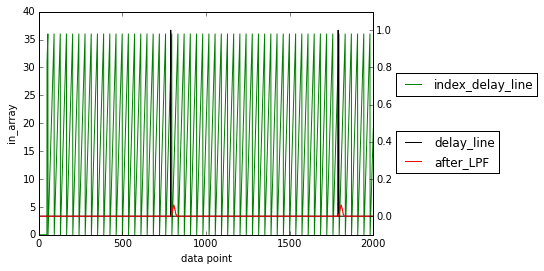

In [106]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

789.0 739.0 839.0


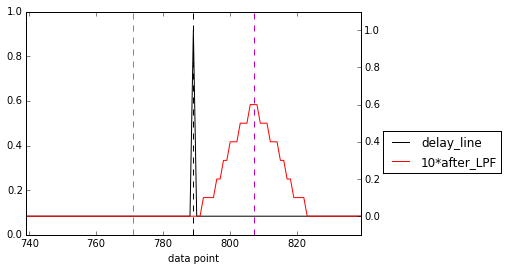

In [108]:
fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
#ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), 10*values4[:,3], 'r', label='10*after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
#ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,2],100)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');

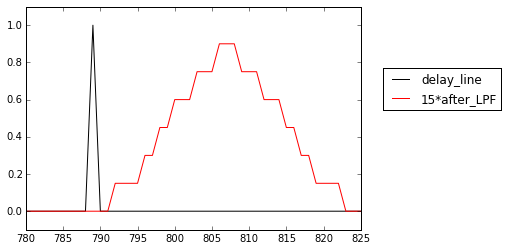

In [109]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax.plot(range(n_values), 15*values4[:,3], 'r', label='15*after_LPF')
ax.set_xlim(780,825)
ax.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75));

## Pulse with raised cosine

[['', '0.00', '0.00'], ['124', '25', '0.00', '0.00'], ['125', '26', '0.00', '0.00'], ['126', '27', '0.00', '0.00'], ['127', '28', '0.00', '0.00']]
(2000, 4)


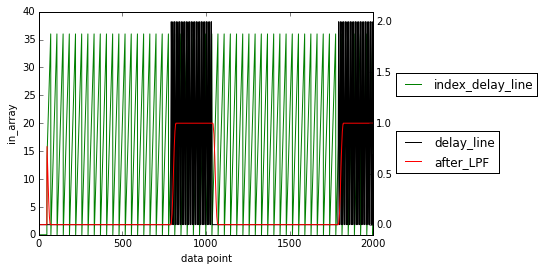

In [115]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 2.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

790.0 740.0 840.0


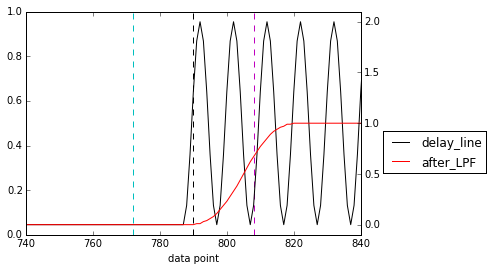

In [116]:
fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
#ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 2.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
#ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,2],100)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');

## Gaussian modulation of raised cosine

[['0', '0', '0.00', '0.00'], ['1', '1', '0.00', '0.00'], ['2', '2', '0.00', '0.00'], ['3', '3', '0.00', '0.00'], ['4', '4', '0.00', '0.00']]
(2000, 4)


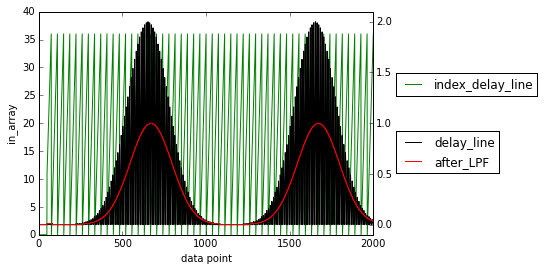

In [117]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 2.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

600.0 500 700


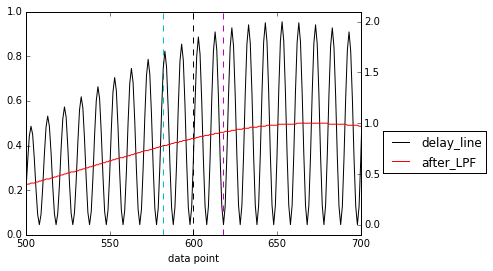

In [119]:
fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
#ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 2.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
#ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,2],100)
x_min, x_max = 500, 700
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');

## Gaussian

[['0', '0', '0.00', '0.00'], ['1', '1', '0.00', '0.00'], ['2', '2', '0.00', '0.00'], ['3', '3', '0.00', '0.00'], ['4', '4', '0.00', '0.00']]
(2000, 4)


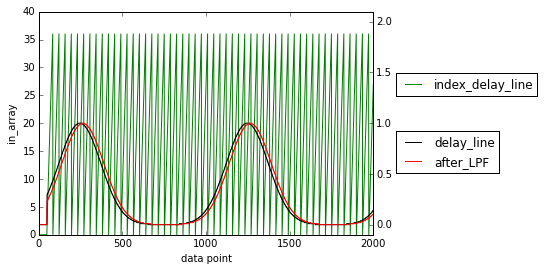

In [120]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 2.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

250.0 150 350


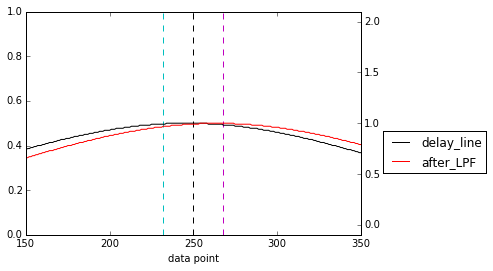

In [122]:
fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
#ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 2.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
#ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,2],200)
x_min, x_max = 150, 350
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');

## Repeat impulse function

[['0', '0', '0.00', '0.00'], ['1', '1', '0.00', '0.00'], ['2', '2', '0.00', '0.00'], ['3', '3', '0.00', '0.00'], ['4', '4', '0.00', '0.00']]
(2000, 4)


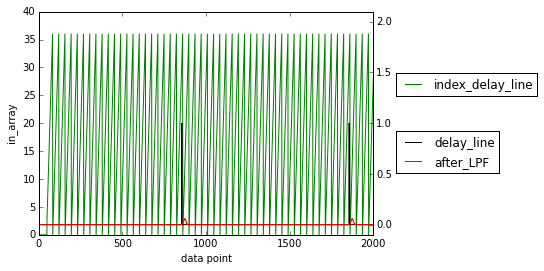

In [124]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 2.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

855.0 805.0 905.0


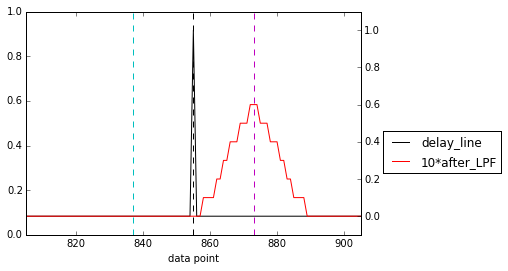

In [125]:
fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
#ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), 10*values4[:,3], 'r', label='10*after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
#ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,2],100)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');

In [126]:
save_impulse_values = np.copy(values4)

In [127]:
print(save_impulse_values[850:890,3])

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.01  0.01  0.01
  0.02  0.02  0.03  0.03  0.04  0.04  0.04  0.05  0.05  0.05  0.06  0.06
  0.06  0.05  0.05  0.05  0.04  0.04  0.04  0.03  0.03  0.02  0.02  0.01
  0.01  0.01  0.01  0.  ]


__Hmm, there are only 2 digits in each number__. In the code there are statements like this: _Serial.println(after_LPF[index_delay_line]);_ Apparently the default number of digits is 2. Change the print statement to _Serial.println(after_LPF[index_delay_line], 5);_ to get 5 digits.

## Impulse again with 5 digits for each float

[['0', '0', '0.00000', '0.00000'], ['1', '1', '0.00000', '0.00000'], ['2', '2', '0.00000', '0.00000'], ['3', '3', '0.00000', '0.00000'], ['4', '4', '0.00000', '0.00000']]
(2000, 4)


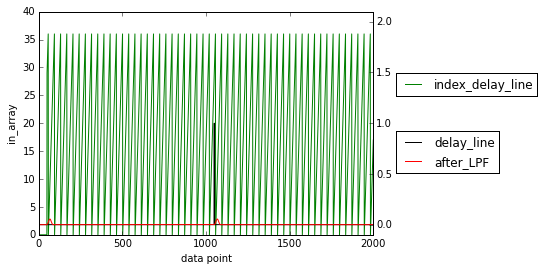

In [128]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 2.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

1049.0 999.0 1099.0


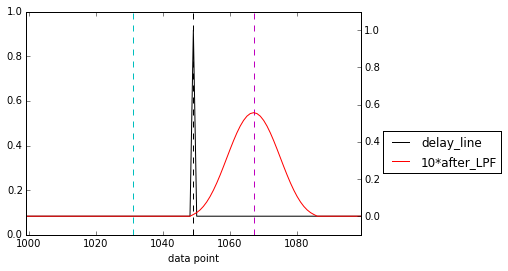

In [129]:
fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
#ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), 10*values4[:,3], 'r', label='10*after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
#ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,2],100)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');

In [130]:
save_impulse_values2 = np.copy(values4)
print(save_impulse_values2[1045:1090,3])

[ 0.       0.       0.       0.       0.00091  0.00193  0.00336  0.00526
  0.00767  0.01059  0.01401  0.01789  0.02215  0.02669  0.03138  0.03606
  0.04058  0.04477  0.04846  0.0515   0.05378  0.05518  0.05566  0.05518
  0.05378  0.0515   0.04846  0.04477  0.04058  0.03606  0.03138  0.02669
  0.02215  0.01789  0.01401  0.01059  0.00767  0.00526  0.00336  0.00193
  0.00091  0.       0.       0.       0.     ]


### Much better!

## Conclusion

The linear phase low pass filter seems to be working just fine.

# Code modification: put coefficient normalization in a function

## Test that we get the same results

[['0', '0', '0.00000', '0.00000'], ['1', '1', '0.00000', '0.00000'], ['2', '2', '0.00000', '0.00000'], ['3', '3', '0.00000', '0.00000'], ['4', '4', '0.00000', '0.00000']]
(2000, 4)


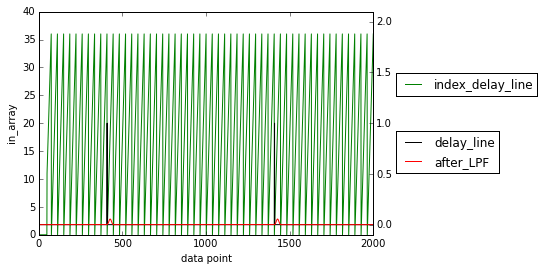

In [131]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), values4[:,3], 'r', label='after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 2.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

409.0 359.0 459.0


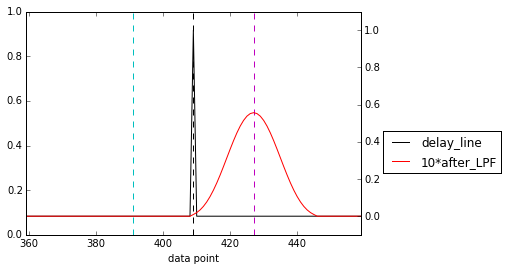

In [132]:
fig, ax = plt.subplots()
#ax.plot(range(n_values), values4[:,0], label='index_test_signal')
ax2 = ax.twinx()
#ax.plot(range(n_values), values4[:,1], 'g', label='index_delay_line')
ax2.plot(range(n_values), values4[:,2], 'k', label='delay_line')
ax2.plot(range(n_values), 10*values4[:,3], 'r', label='10*after_LPF')
#ax.set_ylim(-1, 2)
ax2.set_ylim(-0.1, 1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0.25))
#ax.set_ylabel('in_array')
#ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,2],100)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k', linestyle='--')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c', linestyle='--')
ax.axvline(position+delta, color='m', linestyle='--');